In [1]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("datasets/dogs-vs-cats"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 3 images in 'datasets/dogs-vs-cats'.
There are 0 directories and 12500 images in 'datasets/dogs-vs-cats\test'.
There are 2 directories and 0 images in 'datasets/dogs-vs-cats\train'.
There are 0 directories and 12500 images in 'datasets/dogs-vs-cats\train\cat'.
There are 0 directories and 12501 images in 'datasets/dogs-vs-cats\train\dog'.
There are 2 directories and 0 images in 'datasets/dogs-vs-cats\val'.
There are 0 directories and 1011 images in 'datasets/dogs-vs-cats\val\cat'.
There are 0 directories and 1012 images in 'datasets/dogs-vs-cats\val\dog'.


In [2]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("datasets/dogs-vs-cats/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [3]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['dog.8182.jpg']
Image shape: (374, 499, 3)


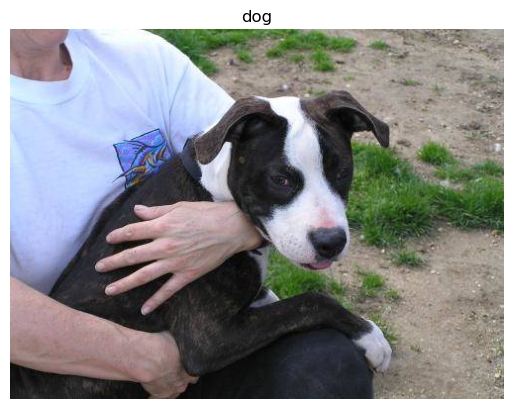

In [4]:
# View a random image from the training dataset
img = view_random_image(target_dir="datasets/dogs-vs-cats/train/",
                        target_class="dog")

In [5]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(374, 499, 3), dtype=uint8, numpy=
array([[[155, 140, 147],
        [155, 138, 146],
        [152, 135, 141],
        ...,
        [161, 156, 153],
        [162, 157, 154],
        [163, 158, 155]],

       [[156, 141, 148],
        [155, 138, 144],
        [153, 136, 142],
        ...,
        [158, 153, 150],
        [159, 154, 151],
        [159, 154, 151]],

       [[157, 140, 146],
        [156, 139, 145],
        [154, 137, 143],
        ...,
        [158, 153, 150],
        [159, 154, 151],
        [159, 154, 151]],

       ...,

       [[ 27,  27,  29],
        [ 29,  29,  31],
        [ 31,  31,  33],
        ...,
        [123, 120, 103],
        [132, 129, 112],
        [142, 139, 122]],

       [[ 28,  28,  30],
        [ 29,  29,  31],
        [ 30,  30,  32],
        ...,
        [ 91,  90,  72],
        [109, 108,  90],
        [127, 126, 108]],

       [[ 29,  29,  31],
        [ 30,  30,  32],
        [ 30,  30,  32],
        ...,
        [119, 117, 10

In [6]:
img.shape

(374, 499, 3)

In [7]:
img/255.

array([[[0.60784314, 0.54901961, 0.57647059],
        [0.60784314, 0.54117647, 0.57254902],
        [0.59607843, 0.52941176, 0.55294118],
        ...,
        [0.63137255, 0.61176471, 0.6       ],
        [0.63529412, 0.61568627, 0.60392157],
        [0.63921569, 0.61960784, 0.60784314]],

       [[0.61176471, 0.55294118, 0.58039216],
        [0.60784314, 0.54117647, 0.56470588],
        [0.6       , 0.53333333, 0.55686275],
        ...,
        [0.61960784, 0.6       , 0.58823529],
        [0.62352941, 0.60392157, 0.59215686],
        [0.62352941, 0.60392157, 0.59215686]],

       [[0.61568627, 0.54901961, 0.57254902],
        [0.61176471, 0.54509804, 0.56862745],
        [0.60392157, 0.5372549 , 0.56078431],
        ...,
        [0.61960784, 0.6       , 0.58823529],
        [0.62352941, 0.60392157, 0.59215686],
        [0.62352941, 0.60392157, 0.59215686]],

       ...,

       [[0.10588235, 0.10588235, 0.11372549],
        [0.11372549, 0.11372549, 0.12156863],
        [0.12156863, 0

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "datasets/dogs-vs-cats/train"
val_dir = "datasets/dogs-vs-cats/val"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=val_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 25000 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
# shallow fully connected neural network for binary image classification
# fully connected neural network (FCNN)
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_0.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
782/782 [==============================] - 64s 81ms/step - loss: 0.6976 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/5
782/782 [==============================] - 53s 68ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 3/5
782/782 [==============================] - 45s 58ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 4/5
782/782 [==============================] - 45s 58ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 5/5
782/782 [==============================] - 45s 58ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4998


In [10]:
# shallow fully connected neural network for binary image classification
# fully connected neural network (FCNN) Large Layer
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
782/782 [==============================] - 45s 57ms/step - loss: 1.1116 - accuracy: 0.5416 - val_loss: 0.7088 - val_accuracy: 0.5487
Epoch 2/5
782/782 [==============================] - 44s 56ms/step - loss: 0.6967 - accuracy: 0.5188 - val_loss: 0.6861 - val_accuracy: 0.5610
Epoch 3/5
782/782 [==============================] - 45s 58ms/step - loss: 0.6932 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 4/5
782/782 [==============================] - 55s 70ms/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 5/5
782/782 [==============================] - 45s 57ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4998


In [11]:
# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
782/782 [==============================] - 94s 120ms/step - loss: 0.5756 - accuracy: 0.6900 - val_loss: 0.5062 - val_accuracy: 0.7538
Epoch 2/5
782/782 [==============================] - 90s 115ms/step - loss: 0.4688 - accuracy: 0.7796 - val_loss: 0.4037 - val_accuracy: 0.8255
Epoch 3/5
782/782 [==============================] - 93s 119ms/step - loss: 0.4055 - accuracy: 0.8175 - val_loss: 0.3634 - val_accuracy: 0.8418
Epoch 4/5
782/782 [==============================] - 93s 119ms/step - loss: 0.3527 - accuracy: 0.8422 - val_loss: 0.2760 - val_accuracy: 0.8917
Epoch 5/5
782/782 [==============================] - 97s 124ms/step - loss: 0.3021 - accuracy: 0.8695 - val_loss: 0.2398 - val_accuracy: 0.9016


In [12]:
def model_accuracy_plot(histories, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns, larger figsize for better readability
    for i, ax in enumerate(axes):
        ax.plot(histories[i].history['accuracy'])
        ax.plot(histories[i].history['val_accuracy'])
        ax.set_title(titles[i])
        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Epoch')
        ax.legend(['Train', 'Validation'], loc='upper left')
        ax.grid(True)  # Optional: adds a grid for easier reading

    plt.tight_layout()
    plt.show()

def model_loss_plot(histories, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, ax in enumerate(axes):
        ax.plot(histories[i].history['loss'])
        ax.plot(histories[i].history['val_loss'])
        ax.set_title(titles[i])
        ax.set_ylabel('Loss')
        ax.set_xlabel('Epoch')
        ax.legend(['Train', 'Validation'], loc='upper left')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

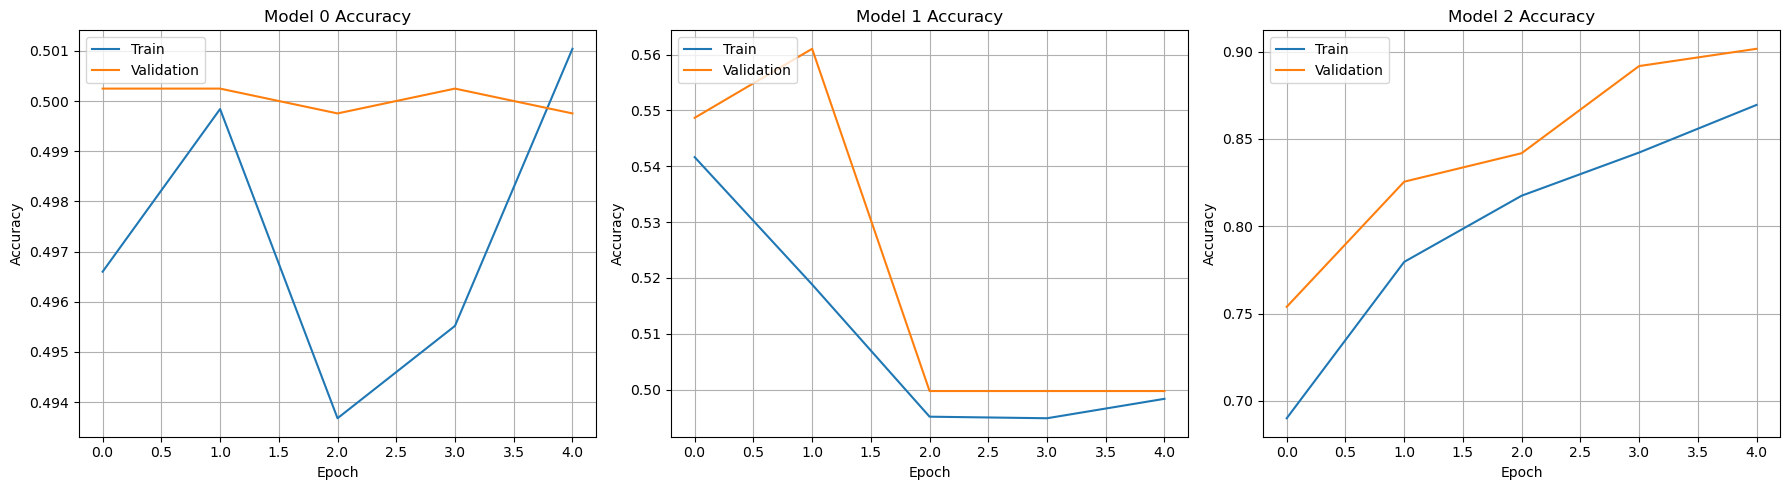

In [13]:
# Call the function with your histories and titles
model_accuracy_plot(
    [history_0, history_1, history_2],
    ["Model 0 Accuracy", "Model 1 Accuracy", "Model 2 Accuracy"]
)

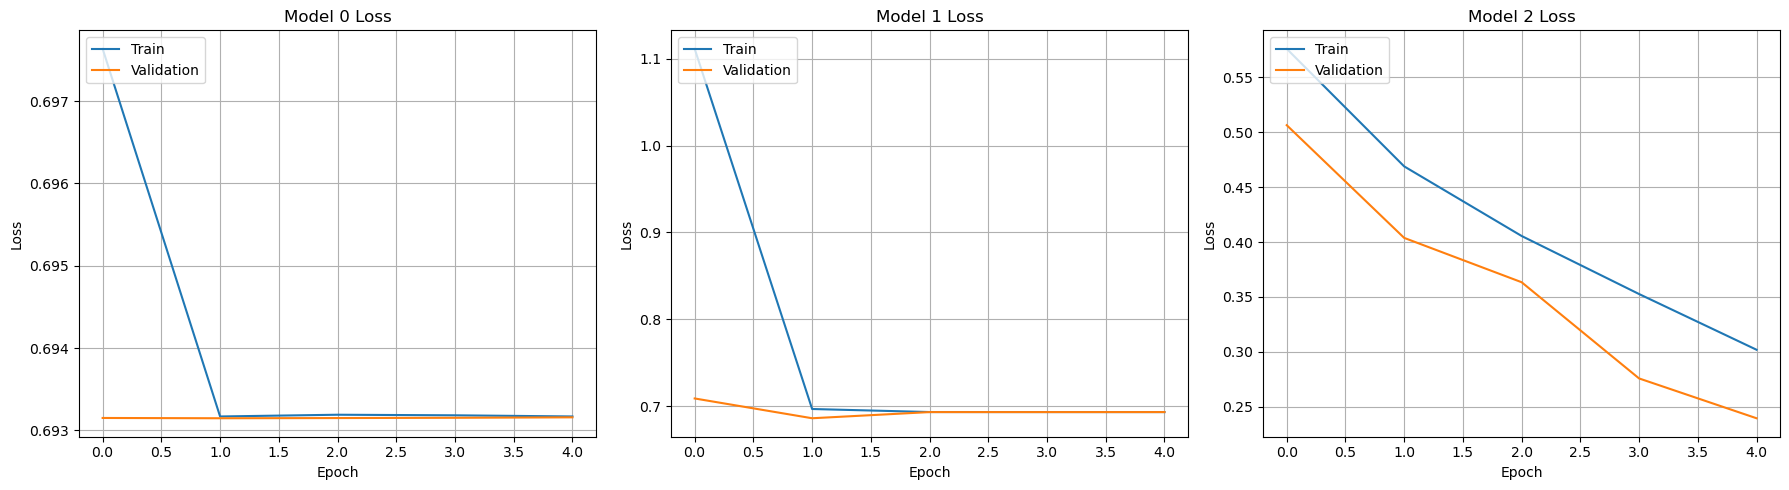

In [14]:
model_loss_plot(
    [history_0, history_1, history_2],
    ["Model 0 Loss", "Model 1 Loss", "Model 2 Loss"]
)

64/64 [==============================] - 8s 122ms/step


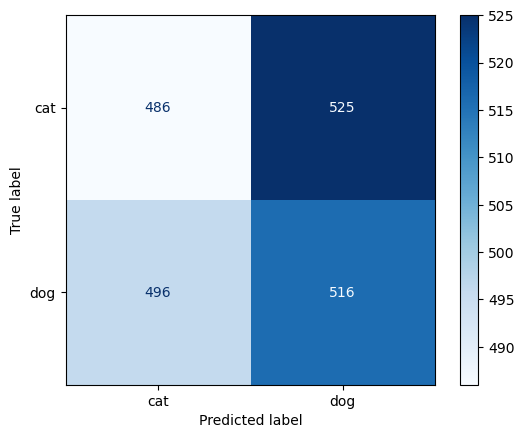

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the true labels and predictions
y_true = valid_data.classes  # true labels from the validation data
y_pred_probs = model_2.predict(valid_data, steps=len(valid_data), verbose=1)  # predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # convert probabilities to binary (0 or 1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=valid_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_matrix_plot(models, titles, valid_data):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, ax in enumerate(axes):
        # Get the true labels and predictions
        y_true = valid_data.classes  # true labels from the validation data
        y_pred_probs = models[i].predict(valid_data, steps=len(valid_data), verbose=1)  # predicted probabilities
        y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # convert probabilities to binary (0 or 1)

        # Generate the confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Display the confusion matrix in the current subplot
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(valid_data.class_indices.keys()))
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

        ax.set_title(titles[i]+" Confuses Matrix")  # Set title for each subplot

    plt.tight_layout()
    plt.show()

64/64 [==============================] - 7s 112ms/step


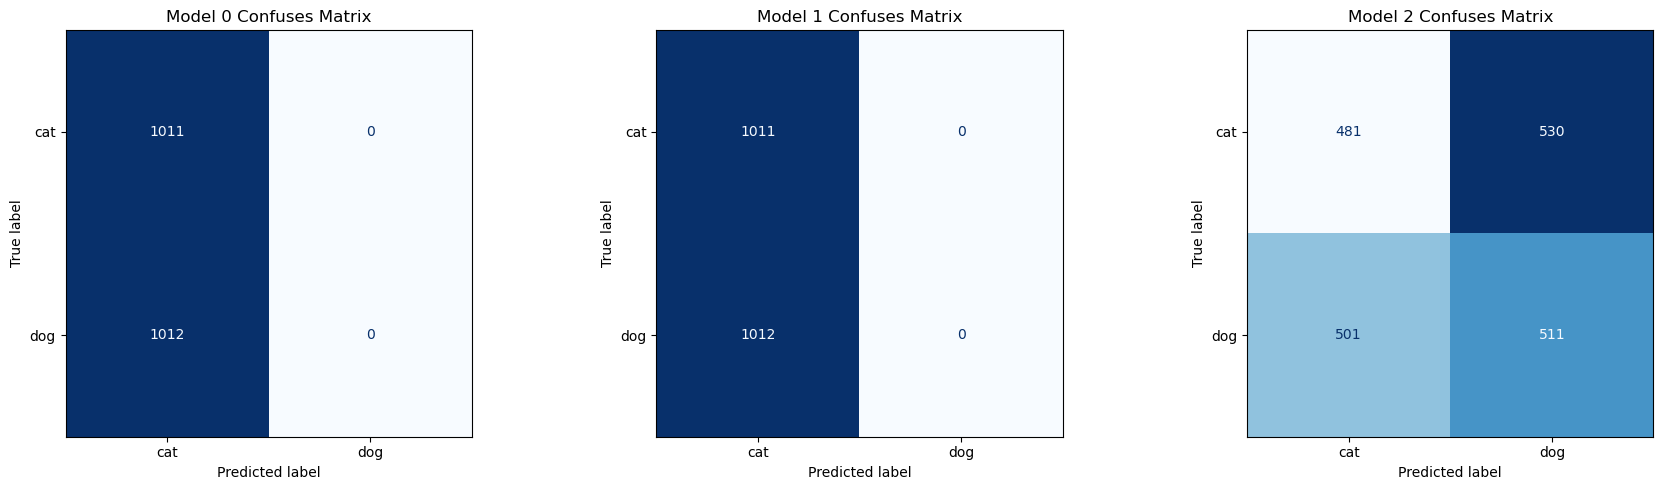

In [17]:
confusion_matrix_plot([model_0, model_1, model_2], ["Model 0", "Model 1", "Model 2"], valid_data)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
    img_array = img_array / 255.0  # Normalize (same as training)
    return img, img_array

def predict_image(test_img_path, models, titles):
    class_labels = ["cat", "dog"]
    original_img, input_image = preprocess_image(test_img_path)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, ax in enumerate(axes):
        predictions = models[i].predict(input_image)
        predicted_class_index = 1 if predictions[0][0] > 0.5 else 0
        predicted_class_label = class_labels[predicted_class_index]
        confidence = predictions[0][0] if predicted_class_index == 1 else 1 - predictions[0][0]

        # Display the image with prediction
        ax.imshow(original_img)
        ax.axis("off")

        ax.set_title(titles[i]+f" Predicted: {predicted_class_label} ({confidence*100:.2f}%)")
    plt.show()

1/1 [==============================] - 0s 158ms/step


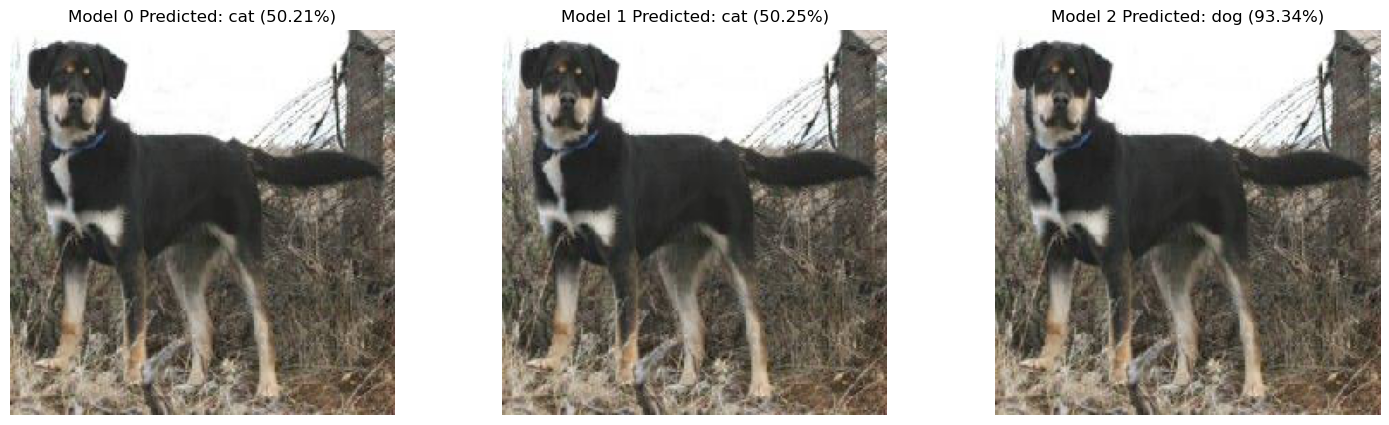

In [19]:
predict_image("datasets/dogs-vs-cats/val/dog/dog.4830(1).jpg", [model_0, model_1, model_2], ["Model 0", "Model 1", "Model 2"])

In [20]:
model_0.save("models/dogs-vs-cats/model_0.h5")

In [21]:
model_1.save("models/dogs-vs-cats/model_1.h5")

In [22]:
model_2.save("models/dogs-vs-cats/model_2.h5")

In [23]:
model_2.save("models/dogs-vs-cats/model_2")

INFO:tensorflow:Assets written to: models/dogs-vs-cats/model_2\assets


INFO:tensorflow:Assets written to: models/dogs-vs-cats/model_2\assets
